### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the input image
image = cv2.imread("../Component 01/Dataset/2024_04_02_11_28_IMG_8807.JPG", cv2.IMREAD_GRAYSCALE)

### Sobel Operator

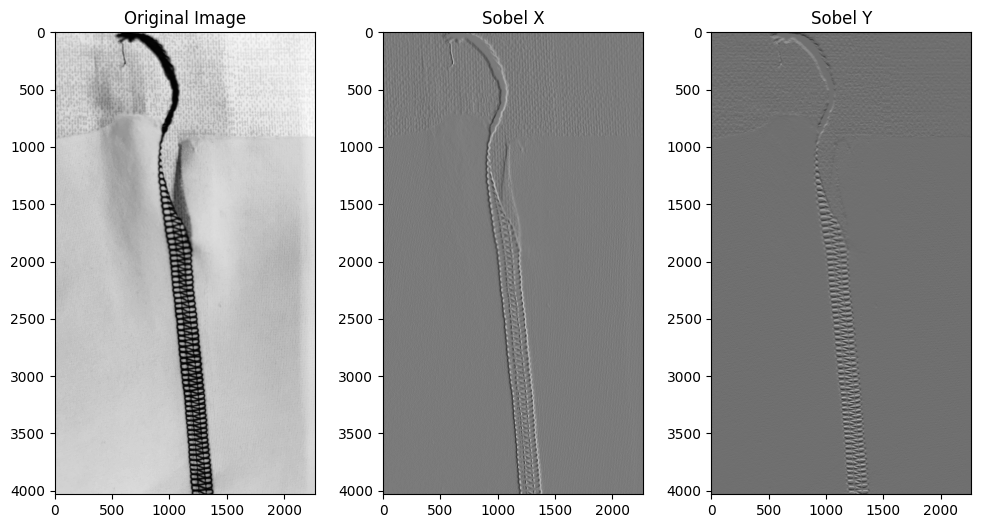

In [3]:
# Apply Sobel operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=9)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=9)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(133), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.show()

### Prewitt Operator

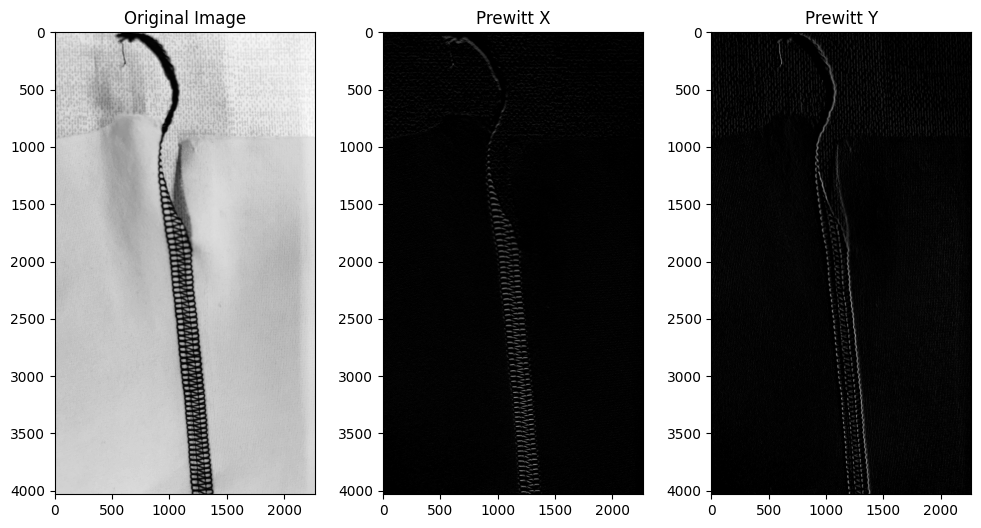

In [4]:
# Define kernel size and normalization method
kernel_size = 9
normalize = True

# Apply Prewitt operator with custom kernel
kernel_x = cv2.getDerivKernels(1, 0, kernel_size, normalize=normalize)
kernel_y = cv2.getDerivKernels(0, 1, kernel_size, normalize=normalize)
prewitt_x = cv2.filter2D(image, -1, kernel_x[0] * kernel_y[0].T)
prewitt_y = cv2.filter2D(image, -1, kernel_y[0] * kernel_x[0].T)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.subplot(133), plt.imshow(prewitt_y, cmap='gray'), plt.title('Prewitt Y')
plt.show()

### Scharr Operator

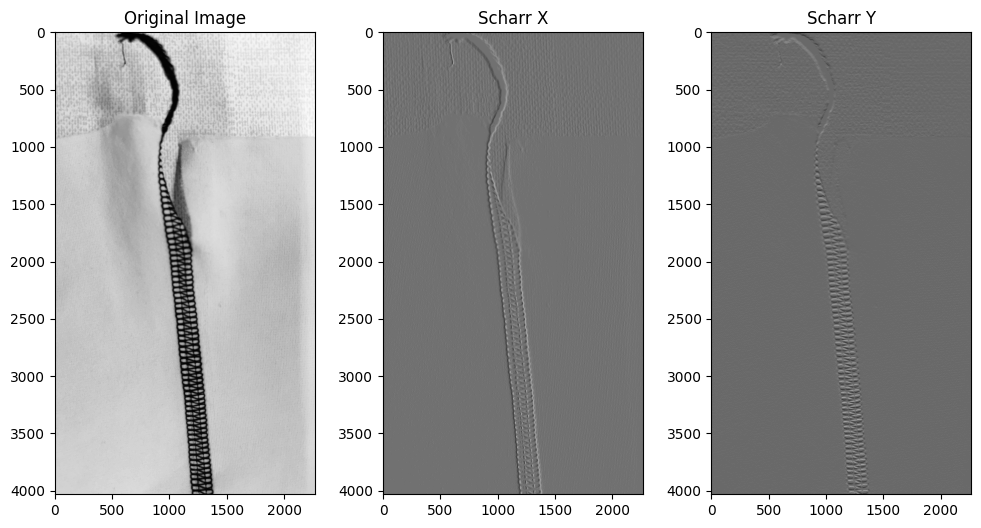

In [5]:
# Apply Scharr operator
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(scharr_x, cmap='gray'), plt.title('Scharr X')
plt.subplot(133), plt.imshow(scharr_y, cmap='gray'), plt.title('Scharr Y')
plt.show()

### Canny Edge Detection

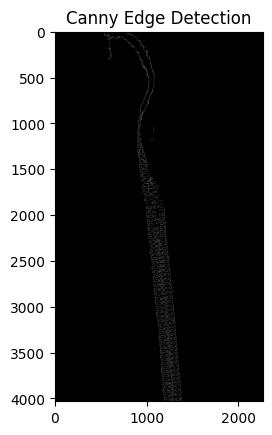

In [6]:
# Apply Canny edge detection
edges = cv2.Canny(image, threshold1=50, threshold2=150)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

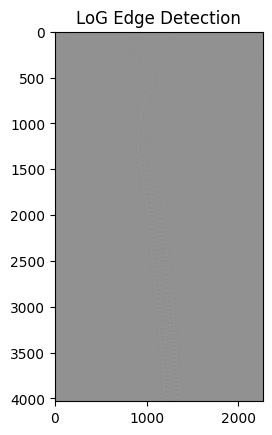

In [7]:
# Apply LoG (Laplacian of Gaussian)
image_blur = cv2.GaussianBlur(image, (1, 1), 1)
edges_log = cv2.Laplacian(image_blur, cv2.CV_64F)

# Display the result
plt.imshow(edges_log, cmap='gray')
plt.title('LoG Edge Detection')
plt.show()

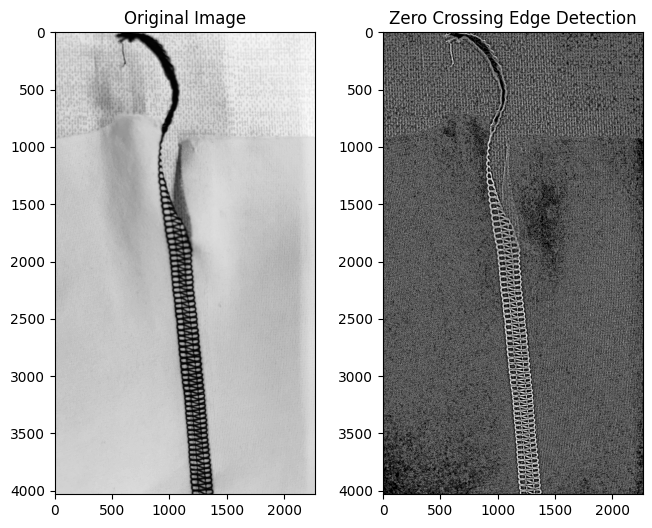

In [8]:
# Apply Gaussian blur
image_blur = cv2.GaussianBlur(image, (9, 9), 9)

# Apply Laplacian operator to compute second derivative
laplacian = cv2.Laplacian(image_blur, cv2.CV_64F)

# Find zero crossings
zero_crossings = np.zeros_like(laplacian)
zero_crossings[laplacian > 0] = 255

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
# plt.subplot(132), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.subplot(132), plt.imshow(zero_crossings, cmap='gray'), plt.title('Zero Crossing Edge Detection')
plt.show()